In [2246]:
import pandas as pd


In [2247]:
df = pd.read_csv('Divar.csv', low_memory=False)
cities = pd.read_csv('iran_city_classification.csv')


In [2248]:
cities.head()

,نام شهر,دسته‌بندی
0,karaj,کلان‌شهر
1,tehran,کلان‌شهر
2,mashhad,کلان‌شهر
3,ahvaz,کلان‌شهر
4,kermanshah,کلان‌شهر


In [2249]:
df.head()

,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,...,NaN,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Merge cities with Divar based on city_slug

In [2250]:
cities = cities.rename(columns={'نام شهر': 'city_slug', 'دسته‌بندی': 'category'})
df = df.merge(cities, on='city_slug')

## Finding Missing Values

In [2251]:
non_null_counts = df.notnull().sum().sort_values(ascending=False)
non_null_percentages = (non_null_counts / len(df)) * 100


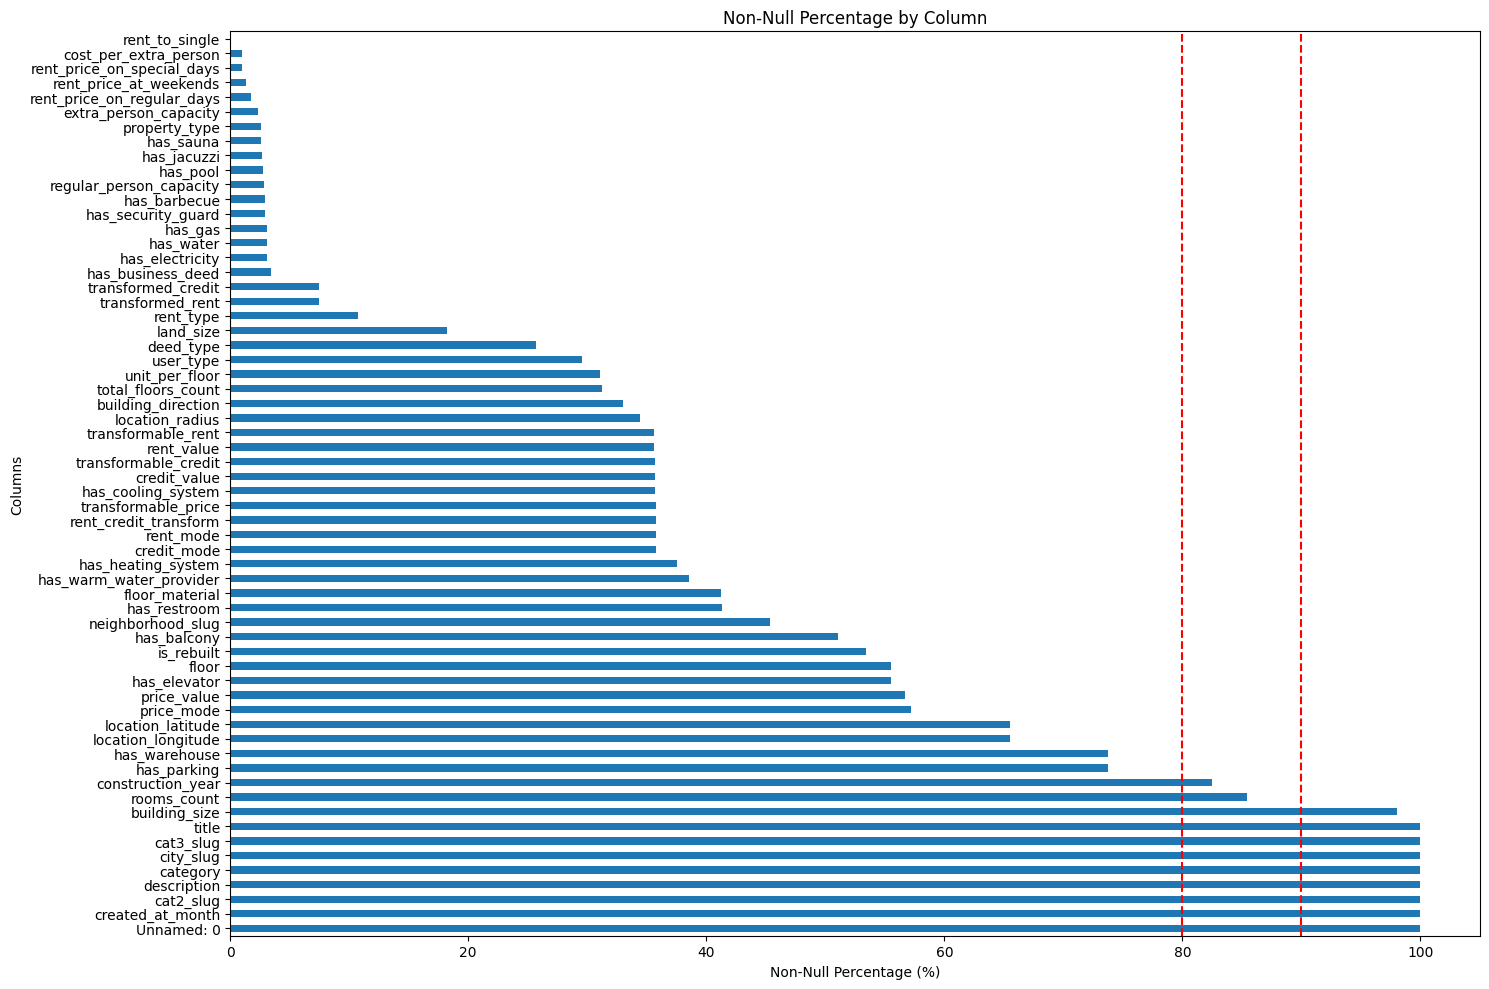

In [2252]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 10))
non_null_percentages.plot(kind='barh')
plt.axvline(x = 80, color = 'r', ls='--')
plt.axvline(x = 90, color = 'r', ls='--')
plt.title('Non-Null Percentage by Column')
plt.xlabel('Non-Null Percentage (%)')
plt.ylabel('Columns')
plt.tight_layout()
plt.show()

In [2253]:
df[['title', 'rent_mode', 'rent_value', 'rent_to_single', 'rent_type',
       'price_mode', 'price_value', 'credit_mode', 'credit_value',
       'rent_credit_transform', 'transformable_price', 'transformable_credit',
       'transformed_credit', 'transformable_rent', 'transformed_rent',]].head()

,title,rent_mode,rent_value,rent_to_single,rent_type,price_mode,price_value,credit_mode,credit_value,rent_credit_transform,transformable_price,transformable_credit,transformed_credit,transformable_rent,transformed_rent
0,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,۶۰ متر قلهک فول امکانات,NaN,NaN,NaN,NaN,مقطوع,8.500000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,26000000.0,NaN,NaN,NaN,NaN,مقطوع,750000000.0,False,False,750000000.0,NaN,26000000.0,NaN
3,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,95000000.0,NaN,NaN,NaN,NaN,مقطوع,950000000.0,False,False,950000000.0,NaN,95000000.0,NaN
4,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,NaN,NaN,NaN,مقطوع,5.750000e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2254]:
df.cat2_slug.value_counts()

cat2_slug
residential-sell        535023
residential-rent        270052
commercial-rent          74566
commercial-sell          36906
temporary-rent           27752
real-estate-services     18978
Name: count, dtype: int64

In [2255]:
df.cat3_slug.value_counts()

cat3_slug
apartment-sell                        299928
apartment-rent                        208957
plot-old                              120619
house-villa-sell                      114476
house-villa-rent                       61095
shop-rent                              44563
office-rent                            21277
shop-sell                              20920
presell                                15443
suite-apartment                        15407
villa                                  11821
industry-agriculture-business-sell     10874
industry-agriculture-business-rent      8725
office-sell                             5112
partnership                             3535
workspace                                524
Name: count, dtype: int64

In [2256]:
df.property_type.value_counts()

property_type
jungle             15638
beach               3555
other               3307
jungle-mountain     2063
mountain             146
Name: count, dtype: int64

In [2257]:
df1 = df.drop(['Unnamed: 0', 'cat2_slug', 'rent_to_single', 'rent_price_on_regular_days',
              'rent_price_on_special_days', 'rent_price_at_weekends', 'cost_per_extra_person',
              'extra_person_capacity', 'regular_person_capacity', 'title', 'description',
              'has_pool', 'has_jacuzzi', 'has_sauna', 'has_security_guard', 'has_barbecue',
              'has_water', 'has_electricity', 'has_gas', 'transformed_credit', 'transformable_rent','transformed_rent',
              'rent_credit_transform', 'has_business_deed', 'property_type', 'user_type'], axis=1)

In [2258]:
df1['rooms_count'].value_counts()

rooms_count
دو              393093
یک              186171
سه              136089
بدون اتاق        73051
چهار             20746
پنج یا بیشتر     13468
Name: count, dtype: int64

## Map rooms count from words into numbers

In [2259]:
room_dic = {'یک':1, 'دو':2, 'سه': 3, 'بدون اتاق':0, 'چهار': 4, 'پنج یا بیشتر': 5}
df1['rooms_count'] = df1['rooms_count'].map(room_dic)


In [2260]:
df1.rooms_count.value_counts()

rooms_count
2.0    393093
1.0    186171
3.0    136089
0.0     73051
4.0     20746
5.0     13468
Name: count, dtype: int64

In [2261]:
df1.columns

Index(['cat3_slug', 'city_slug', 'neighborhood_slug', 'created_at_month',
       'rent_mode', 'rent_value', 'rent_type', 'price_mode', 'price_value',
       'credit_mode', 'credit_value', 'transformable_price',
       'transformable_credit', 'land_size', 'building_size', 'deed_type',
       'floor', 'rooms_count', 'total_floors_count', 'unit_per_floor',
       'has_balcony', 'has_elevator', 'has_warehouse', 'has_parking',
       'construction_year', 'is_rebuilt', 'has_warm_water_provider',
       'has_heating_system', 'has_cooling_system', 'has_restroom',
       'building_direction', 'floor_material', 'location_latitude',
       'location_longitude', 'location_radius', 'category'],
      dtype='object')

In [2262]:
df1['rent_type'].value_counts()

rent_type
rent_credit    103048
full_credit       144
Name: count, dtype: int64

In [2263]:
df1['rent_mode'].value_counts()

rent_mode
مقطوع     284690
مجانی      58177
توافقی      1625
Name: count, dtype: int64

In [2264]:
df1[df1['credit_mode']=='مقطوع'][['transformable_credit', 'price_value']]

,transformable_credit,price_value
2,7.500000e+08,NaN
3,9.500000e+08,NaN
5,2.500000e+08,NaN
6,1.500000e+08,NaN
11,1.200000e+09,NaN
...,...,...
963262,2.200000e+08,NaN
963264,3.000000e+07,NaN
963270,1.500000e+08,NaN
963273,1.000000e+09,NaN


In [2265]:
df1[df1['rent_mode']=='مجانی']['transformable_credit']

11        1.200000e+09
38        2.500000e+08
48        1.500000e+09
65        2.500000e+09
92        1.200000e+09
              ...     
963228    5.000000e+08
963236    3.600000e+08
963240    3.100000e+08
963246    4.600000e+08
963276    3.500000e+08
Name: transformable_credit, Length: 58177, dtype: float64

In [2266]:
df1['has_balcony'].value_counts()

has_balcony
true        382337
false        84877
True         20194
False         4321
unselect       207
Name: count, dtype: int64

In [2267]:
df1.construction_year.value_counts()

construction_year
۱۴۰۳           113120
۱۳۹۰            57381
۱۴۰۲            56835
۱۴۰۰            52210
۱۳۹۵            51540
۱۳۹۸            37329
۱۳۹۷            35540
۱۳۹۶            34694
۱۴۰۱            34530
۱۳۸۵            33335
۱۳۹۹            28890
۱۳۹۳            28387
۱۳۹۴            25438
۱۳۹۲            25334
۱۳۸۸            23804
۱۳۸۰            22809
قبل از ۱۳۷۰     19688
۱۳۸۹            16391
۱۳۹۱            15870
۱۳۸۷            13867
۱۳۸۶            13181
۱۳۸۳             9746
۱۳۸۴             8367
۱۳۷۵             7009
۱۳۸۲             6834
۱۳۷۱             5316
۱۳۸۱             3523
۱۳۷۸             2952
۱۳۷۹             2349
۱۳۷۷             2037
۱۳۷۲             1837
۱۳۷۳             1769
۱۳۷۶             1544
۱۳۷۴             1245
Name: count, dtype: int64

In [2268]:
df1.loc[df1.construction_year=='قبل از ۱۳۷۰', 'construction_year'] = 1369
df1.construction_year = df1.construction_year.astype('float')


In [2269]:
df1['full_price'] = df1['price_value']

df1['full_credit'] = df1['credit_value'] + (df1['rent_value']/3)*100
df1['full_credit']

0                  NaN
1                  NaN
2         1.616667e+09
3         4.116667e+09
4                  NaN
              ...     
963272             NaN
963273    2.500000e+09
963274             NaN
963275             NaN
963276    3.500000e+08
Name: full_credit, Length: 963277, dtype: float64

In [2270]:
this_year = max(df1.construction_year.value_counts().index)

def find_full_price(x):
    if x['full_price'] is not None:
        return x['full_price']
    if x['construction_year'] is None:
        return x['full_credit']*5
    elif this_year - x['construction_year'] < 5:
        return x['full_credit']*4
    elif this_year - x['construction_year'] < 10:
        return x['full_credit']*5
    else:
        return x['full_credit']*6

In [2271]:
df1['full_price'] = df1.apply(find_full_price, axis=1)

In [2272]:
df1['full_price'].isna().sum()

np.int64(417303)

In [2273]:
df2 = df1.dropna(subset=['full_price']).reset_index().drop(['index', 'rent_mode', 'rent_type', 'price_mode', 'rent_value', 'credit_value',
       'price_value', 'credit_mode', 'transformable_price', 'transformable_credit', 'full_credit'], axis=1)

In [2274]:
df2.full_price = df2.full_price/1000000

In [2275]:
(df2.sort_values(by='full_price')['full_price']<100).sum()

np.int64(15637)

{'whiskers': [<matplotlib.lines.Line2D at 0xb29228490>,
 'caps': [<matplotlib.lines.Line2D at 0xb29229850>,
 'boxes': [<matplotlib.lines.Line2D at 0xbd0b615d0>],
 'medians': [<matplotlib.lines.Line2D at 0xb2922ac10>],
 'fliers': [<matplotlib.lines.Line2D at 0xb2922b650>],
 'means': []}

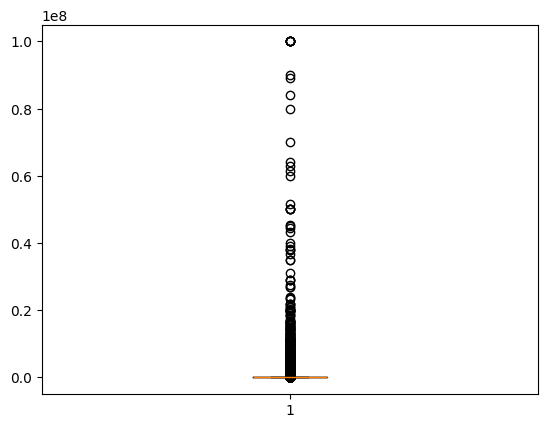

In [2276]:
plt.boxplot(df2.full_price)

In [2277]:
df2 = df2.drop(df2[(df2.full_price<50)|(df2.full_price>5e9)].index)

In [2278]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531417 entries, 0 to 545973
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cat3_slug                531417 non-null  object 
 1   city_slug                531417 non-null  object 
 2   neighborhood_slug        229518 non-null  object 
 3   created_at_month         531417 non-null  object 
 4   land_size                108757 non-null  float64
 5   building_size            530195 non-null  float64
 6   deed_type                241719 non-null  object 
 7   floor                    298414 non-null  object 
 8   rooms_count              431136 non-null  float64
 9   total_floors_count       182095 non-null  object 
 10  unit_per_floor           179938 non-null  object 
 11  has_balcony              297902 non-null  object 
 12  has_elevator             298414 non-null  object 
 13  has_warehouse            407175 non-null  object 
 14  has_parki

{'whiskers': [<matplotlib.lines.Line2D at 0xbd0b6e510>,
 'caps': [<matplotlib.lines.Line2D at 0xbd0b6fb50>,
 'boxes': [<matplotlib.lines.Line2D at 0xbd0b6db50>],
 'medians': [<matplotlib.lines.Line2D at 0xc37d48910>],
 'fliers': [<matplotlib.lines.Line2D at 0xc37d49310>],
 'means': []}

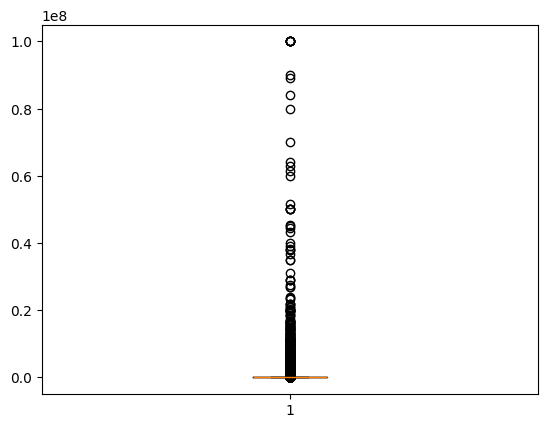

In [2279]:
plt.boxplot(df2.full_price)

<Axes: >

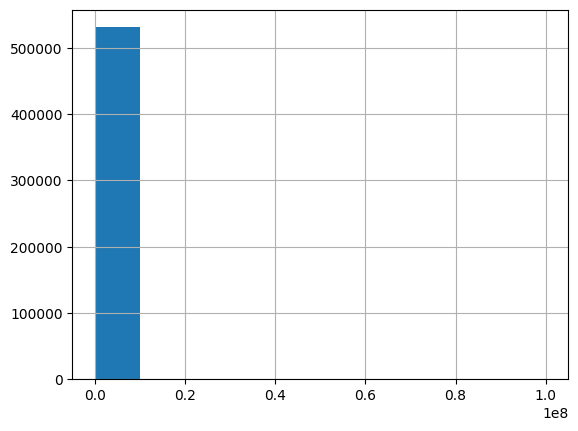

In [2280]:
df2.full_price.hist()

In [2281]:
import numpy as np
def replace_outliers(df, c_name):
    c = df[c_name]
    df[c_name] = df[c_name].astype(float)
    q1 = c.quantile(0.25)
    q3 = c.quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    
    c = np.where(c>upper, upper, c)
    c = np.where(c<lower, lower, c)
    df.loc[:, c_name] = c
    return df

In [2282]:
df2 = replace_outliers(df2, 'full_price')

{'whiskers': [<matplotlib.lines.Line2D at 0xc376bfc50>,
 'caps': [<matplotlib.lines.Line2D at 0xbd779ce50>,
 'boxes': [<matplotlib.lines.Line2D at 0xc376bf310>],
 'medians': [<matplotlib.lines.Line2D at 0xbd779e310>],
 'fliers': [<matplotlib.lines.Line2D at 0xbd779ea10>],
 'means': []}

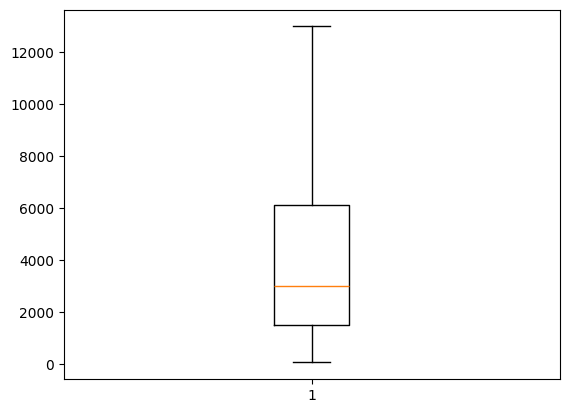

In [2283]:
plt.boxplot(df2.full_price)

<Axes: >

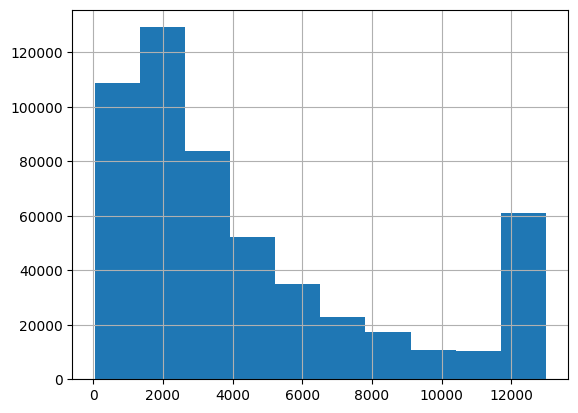

In [2284]:
df2.full_price.hist()

In [2285]:
df2.sort_values(by='full_price')

,cat3_slug,city_slug,neighborhood_slug,created_at_month,land_size,building_size,deed_type,floor,rooms_count,total_floors_count,...,has_heating_system,has_cooling_system,has_restroom,building_direction,floor_material,location_latitude,location_longitude,location_radius,category,full_price
228978,plot-old,yazd,NaN,2024-07-01 00:00:00,NaN,500.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35.688332,50.979565,NaN,شهر کوچک,50.0
179523,apartment-sell,mashhad,bolvartoos,2024-10-01 00:00:00,NaN,50.0,NaN,0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,کلان‌شهر,50.0
102470,plot-old,karaj,shahinvilla,2024-10-01 00:00:00,NaN,500.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35.847485,50.950539,NaN,کلان‌شهر,50.0
400040,plot-old,mahmudabad,NaN,2024-07-01 00:00:00,NaN,228.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,36.561268,52.288471,500.0,شهر کوچک,50.0
91029,house-villa-sell,yazd,NaN,2024-12-01 00:00:00,160.0,300.0,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,شهر کوچک,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182106,plot-old,tehran,mirdamad,2024-06-01 00:00:00,NaN,500.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35.762489,51.429859,500.0,کلان‌شهر,12985.0
182111,apartment-sell,mashhad,azadshahr,2024-12-01 00:00:00,NaN,175.0,single_page,5,3.0,6,...,duct_split,duct_split,squat_seat,south,stone,36.322556,59.527782,NaN,کلان‌شهر,12985.0
383141,apartment-sell,tehran,zafaraniyeh,2024-10-01 00:00:00,NaN,210.0,NaN,4,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,35.808865,51.415756,NaN,کلان‌شهر,12985.0
492085,house-villa-sell,khorramshahr,NaN,2024-12-01 00:00:00,200.0,170.0,single_page,NaN,3.0,NaN,...,NaN,NaN,squat_seat,north,ceramic,NaN,NaN,NaN,شهر کوچک,12985.0


In [2286]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531417 entries, 0 to 545973
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cat3_slug                531417 non-null  object 
 1   city_slug                531417 non-null  object 
 2   neighborhood_slug        229518 non-null  object 
 3   created_at_month         531417 non-null  object 
 4   land_size                108757 non-null  float64
 5   building_size            530195 non-null  float64
 6   deed_type                241719 non-null  object 
 7   floor                    298414 non-null  object 
 8   rooms_count              431136 non-null  float64
 9   total_floors_count       182095 non-null  object 
 10  unit_per_floor           179938 non-null  object 
 11  has_balcony              297902 non-null  object 
 12  has_elevator             298414 non-null  object 
 13  has_warehouse            407175 non-null  object 
 14  has_parki

In [2287]:
df2['created_at_month'] = pd.to_datetime(df2['created_at_month'])

In [2288]:
df2['created_at_month'].apply(lambda x: x.year).value_counts()

created_at_month
2024    529362
2023      1111
2025       916
2022        26
2021         2
Name: count, dtype: int64

In [2289]:
df2['year'] = df2['created_at_month'].apply(lambda x: x.year)
df2 = df2[df2.year==2024]
df2 = df2.drop(['created_at_month', 'year'], axis=1)

In [2290]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529362 entries, 0 to 545973
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cat3_slug                529362 non-null  object 
 1   city_slug                529362 non-null  object 
 2   neighborhood_slug        228864 non-null  object 
 3   land_size                108189 non-null  float64
 4   building_size            528141 non-null  float64
 5   deed_type                240621 non-null  object 
 6   floor                    297309 non-null  object 
 7   rooms_count              429404 non-null  float64
 8   total_floors_count       181409 non-null  object 
 9   unit_per_floor           179256 non-null  object 
 10  has_balcony              296627 non-null  object 
 11  has_elevator             297309 non-null  object 
 12  has_warehouse            405502 non-null  object 
 13  has_parking              405502 non-null  object 
 14  construct

In [2291]:
df2.city_slug.value_counts()

city_slug
tehran        97122
mashhad       35133
karaj         27929
isfahan       20159
shiraz        18206
              ...  
kiasar           56
hendijan         51
shal             48
lavandevil       38
hormuz           21
Name: count, Length: 240, dtype: int64

In [2292]:
df2.groupby(['city_slug'])['neighborhood_slug'].apply(pd.Series.mode)

city_slug       
ahvaz          0              kianpars
bandar-anzali  0          chaharfarize
isfahan        0    baharestan-esfahan
karaj          0       andishehnewcity
lahijan        0      golestan-lahijan
mashhad        0          elahiyehblvd
qom            0         pardisan-ghom
rasht          0               golsaar
shiraz         0              mianrood
talesh         0              hashtpar
tehran         0                poonak
Name: neighborhood_slug, dtype: object

In [2293]:
df2['neighborhood_slug'].value_counts()

neighborhood_slug
elahiyehblvd       4585
poonak             2836
bolvartoos         2722
ghasemabad         2613
jeyhoun            2220
                   ... 
bahonar-rasht         1
amir-shahid           1
shahrak-sanaati       1
volox                 1
jamaran-rasht         1
Name: count, Length: 1175, dtype: int64

In [2294]:
df2['neighborhood_slug'] = df2['neighborhood_slug'].fillna('Unknown')

### building_size

In [2295]:
df2['building_size'] = df2.groupby(['city_slug', 'neighborhood_slug'])['building_size'].transform(lambda x: x.fillna(x.median()))

### land_size

In [2296]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529362 entries, 0 to 545973
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cat3_slug                529362 non-null  object 
 1   city_slug                529362 non-null  object 
 2   neighborhood_slug        529362 non-null  object 
 3   land_size                108189 non-null  float64
 4   building_size            529362 non-null  float64
 5   deed_type                240621 non-null  object 
 6   floor                    297309 non-null  object 
 7   rooms_count              429404 non-null  float64
 8   total_floors_count       181409 non-null  object 
 9   unit_per_floor           179256 non-null  object 
 10  has_balcony              296627 non-null  object 
 11  has_elevator             297309 non-null  object 
 12  has_warehouse            405502 non-null  object 
 13  has_parking              405502 non-null  object 
 14  construct

In [2297]:
land_size_medians = df2.groupby('building_size')['land_size'].median().ffill()
df2['land_size'] = df2['land_size'].fillna(df2['building_size'].map(land_size_medians))

### total_floor_count

In [2298]:
df2.total_floors_count.value_counts()

total_floors_count
4           54972
5           50573
3           29588
6           18745
2            8308
7            5374
8            2754
14           2310
10           1598
9            1159
12            999
11            903
13            799
15            640
16            476
20            351
18            285
21            210
25            210
19            174
17            155
30            148
30+           141
24            105
22             82
29             72
unselect       65
26             41
4.0            34
5.0            30
23             24
3.0            22
27             18
28             14
6.0            10
2.0             6
10.0            2
13.0            2
7.0             2
12.0            1
8.0             1
14.0            1
20.0            1
11.0            1
21.0            1
19.0            1
25.0            1
Name: count, dtype: int64

In [2299]:
df2.loc[df2['total_floors_count']=='unselect','total_floors_count'] = None
df2.loc[df2['total_floors_count']=='30+','total_floors_count'] = '30'

In [2300]:
df2['total_floors_count'] = df2['total_floors_count'].astype('float')
floors_medians = df2.groupby(['city_slug', 'neighborhood_slug'])['total_floors_count'].median()

df2['group_key'] = list(zip(df2['city_slug'], df2['neighborhood_slug']))
df2['total_floors_count'] = df2['total_floors_count'].fillna(df2['group_key'].map(floors_medians))

In [2301]:
df2['total_floors_count'] = df2['total_floors_count'].fillna(df2['total_floors_count'].median())

### total_floor_count

In [2302]:
df2.floor.value_counts()

floor
2       70835
3       63156
1       62076
4       42650
5       22471
0       14244
6        8425
7        3374
8        1871
10       1409
9        1300
11        923
-1        885
12        786
13        521
14        507
30+       410
15        269
16        177
17        159
18        119
20        112
19         84
21         64
25         63
22         47
1.0        45
23         44
30         43
2.0        43
3.0        36
24         30
4.0        25
28         23
27         17
5.0        15
26         14
29         12
0.0         9
7.0         5
6.0         4
20.0        1
8.0         1
22.0        1
14.0        1
9.0         1
11.0        1
10.0        1
Name: count, dtype: int64

In [2303]:
df2.loc[df2['floor']=='30+','floor'] = '30'
df2['floor'] = df2['floor'].astype('float')

In [2304]:
df2.floor.isna().sum()

np.int64(232053)

In [2305]:
df2['floor'] = df2['floor'].fillna(
    df2['total_floors_count'].map(
        df2.groupby('total_floors_count')['floor'].median()
    )
)


### unit_per_floor

In [2306]:
df2['unit_per_floor'].value_counts()

unit_per_floor
2              73054
1              52173
4              23871
3              19893
5               3006
6               2975
8               2214
more_than_8     1371
7                557
unselect         142
Name: count, dtype: int64

In [2307]:
df2.loc[df2['unit_per_floor']=='more_than_8','unit_per_floor'] = '9'
df2.loc[df2['unit_per_floor']=='unselect','unit_per_floor'] = None
df2['unit_per_floor'] = df2['unit_per_floor'].astype('float')

In [2308]:
df2['unit_per_floor'] = df2['unit_per_floor'].fillna(
    df2['total_floors_count'].map(
        df2.groupby('total_floors_count')['unit_per_floor'].median()
    )
)

In [2309]:
df2 = df2.dropna(subset=['unit_per_floor'])

### Rooms count

In [2310]:
df2.rooms_count.isna().sum()

np.int64(99958)

In [2311]:
rooms_medians = df2.groupby('building_size')['rooms_count'].median().ffill()

df2['rooms_count'] = df2['rooms_count'].fillna(
    df2['building_size'].map(rooms_medians)
)

### location ('location_latitude', 'location_longitude', 'location_radius')

#### location_latitude

In [2312]:
df2.location_latitude.isna().sum()

np.int64(182465)

In [2313]:
df2['group_key'] = list(zip(df2['city_slug'], df2['neighborhood_slug']))
lat_medians = df2.groupby(['group_key'])['location_latitude'].median().ffill()

df2['location_latitude'] = df2['location_latitude'].fillna(
    df2['group_key'].map(lat_medians)
)

In [2314]:
df2.drop(columns='group_key', inplace=True)

#### location_longitude

In [2315]:
df2.location_longitude.isna().sum()

np.int64(182465)

In [2316]:
df2['group_key'] = list(zip(df2['city_slug'], df2['neighborhood_slug']))
lat_medians = df2.groupby(['group_key'])['location_longitude'].median().ffill()

df2['location_longitude'] = df2['location_longitude'].fillna(
    df2['group_key'].map(lat_medians)
)

In [2317]:
df2.drop(columns='group_key', inplace=True)

#### location_radius

In [2318]:
df2.location_radius.isna().sum()

np.int64(332007)

In [2319]:
df2['group_key'] = list(zip(df2['city_slug'], df2['neighborhood_slug']))
lat_medians = df2.groupby(['group_key'])['location_radius'].median().ffill()

df2['location_radius'] = df2['location_radius'].fillna(
    df2['group_key'].map(lat_medians)
)
df2.drop(columns='group_key', inplace=True)

In [2320]:
df2.location_radius.isna().sum()

np.int64(0)

### floor_material

In [2321]:
df2['floor_material'].value_counts()

floor_material
ceramic             181782
stone                21592
wood_parquet          8623
carpet                7587
mosaic                6924
laminate_parquet      5704
floor_covering        1024
unselect               892
Name: count, dtype: int64

In [2322]:
df2.groupby(['city_slug', 'neighborhood_slug'])['floor_material'].apply(pd.Series.mode).reset_index().isna().sum()

city_slug            0
neighborhood_slug    0
level_2              0
floor_material       0
dtype: int64

In [2323]:
df2['group_key'] = list(zip(df2['city_slug'], df2['neighborhood_slug']))

floor_mode = df2.groupby('group_key')['floor_material'].agg(
    lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan
)

df2['floor_material'] = df2['floor_material'].fillna(
    df2['group_key'].map(floor_mode)
)

df2.drop(columns='group_key', inplace=True)

In [2324]:
df2['floor_material'].isna().sum()

np.int64(64)

In [2325]:
df2 = df2.dropna(subset=['floor_material'])

In [2326]:
df2['floor_material'].isna().sum()

np.int64(0)

In [2327]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529293 entries, 0 to 545973
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cat3_slug                529293 non-null  object 
 1   city_slug                529293 non-null  object 
 2   neighborhood_slug        529293 non-null  object 
 3   land_size                529293 non-null  float64
 4   building_size            529293 non-null  float64
 5   deed_type                240612 non-null  object 
 6   floor                    529293 non-null  float64
 7   rooms_count              529293 non-null  float64
 8   total_floors_count       529293 non-null  float64
 9   unit_per_floor           529293 non-null  float64
 10  has_balcony              296608 non-null  object 
 11  has_elevator             297290 non-null  object 
 12  has_warehouse            405466 non-null  object 
 13  has_parking              405466 non-null  object 
 14  construct

### deed_type

In [2328]:
df2.deed_type.value_counts()

deed_type
single_page          185558
written_agreement     29721
other                 19022
multi_page             5802
unselect                509
Name: count, dtype: int64

In [2329]:
df2.loc[df2['deed_type']=='unselect','deed_type'] = None

In [2330]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['deed_type'] = le.fit_transform(df2['deed_type'])

In [2331]:
df2.deed_type.value_counts()

deed_type
5    288681
2    185558
3     29721
1     19022
0      5802
4       509
Name: count, dtype: int64

### building direction

In [2332]:
df2['building_direction'].value_counts()

building_direction
south       97296
north       85316
east         7064
west         4115
unselect     1914
Name: count, dtype: int64

In [2333]:
df2.groupby(['city_slug', 'neighborhood_slug'])['building_direction'].apply(pd.Series.mode).reset_index().isna().sum()

city_slug             0
neighborhood_slug     0
level_2               0
building_direction    0
dtype: int64

In [2334]:
df2['group_key'] = list(zip(df2['city_slug'], df2['neighborhood_slug']))
building_dir_mode = df2.groupby('group_key')['building_direction'].agg(
    lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan
)

In [2335]:
df2['building_direction'] = df2['building_direction'].fillna(
    df2['group_key'].map(building_dir_mode)
)
df2.drop(columns='group_key', inplace=True)

In [2336]:
df2 = df2.dropna(subset=['building_direction'])

### construction_year

In [2337]:
df2['construction_year'].value_counts()

construction_year
1403.0    79965
1402.0    37525
1400.0    24167
1390.0    23339
1395.0    22953
1401.0    19420
1397.0    17977
1398.0    17685
1396.0    17557
1385.0    16207
1393.0    15176
1399.0    13934
1394.0    13868
1392.0    13027
1388.0    12058
1369.0    10754
1380.0    10217
1391.0     8536
1389.0     8364
1387.0     7589
1386.0     7509
1383.0     5897
1384.0     5196
1382.0     4117
1375.0     3557
1371.0     2707
1381.0     2217
1378.0     1721
1379.0     1312
1377.0     1145
1372.0      994
1373.0      988
1376.0      887
1374.0      683
Name: count, dtype: int64

In [2338]:
df2['group_key'] = list(zip(df2['city_slug'], df2['neighborhood_slug']))
cunstruction_year_mode = df2.groupby('group_key')['construction_year'].agg(
    lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan
)
df2['construction_year'] = df2['construction_year'].fillna(
    df2['group_key'].map(cunstruction_year_mode)
)
df2.drop(columns='group_key', inplace=True)

In [2339]:
def setOldCate(x):
    if this_year - x < 5:
        return 1
    elif this_year - x < 10:
        return 10
    elif this_year - x < 20:
        return 20
    else:
        return 30

In [2340]:
df2['age_category'] = df2['construction_year'].apply(setOldCate)


### has_restroom

In [2341]:
df2['has_restroom'].value_counts()

has_restroom
squat_seat    138122
squat          91719
seat            3837
unselect         362
Name: count, dtype: int64

In [2342]:
df2.loc[df2['has_restroom']=='unselect','has_restroom'] = None

In [2343]:
df2.groupby(['age_category'])['has_restroom'].apply(pd.Series.mode).reset_index()

,age_category,level_1,has_restroom
0,1,0,squat_seat
1,10,0,squat_seat
2,20,0,squat
3,30,0,squat


In [2344]:
has_restroom_mode = df2.groupby('age_category')['has_restroom'].agg(
    lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan
)
df2['has_restroom'] = df2['has_restroom'].fillna(
    df2['age_category'].map(has_restroom_mode)
)

### is_rebuilt

In [2345]:
df2['is_rebuilt'].value_counts()

is_rebuilt
False    194477
True     100809
Name: count, dtype: int64

In [2346]:
is_rebuilt_mode = df2.groupby('age_category')['is_rebuilt'].agg(
    lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan
)
df2['is_rebuilt'] = df2['is_rebuilt'].fillna(
    df2['age_category'].map(is_rebuilt_mode)
)

/var/folders/f3/jwbldmtj6p5516pfkyqjz6_40000gn/T/ipykernel_7274/1043710675.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['is_rebuilt'] = df2['is_rebuilt'].fillna(


### has_warm_water_provider

In [2347]:
df2['has_warm_water_provider'].value_counts()

has_warm_water_provider
package         130366
water_heater     69163
powerhouse       16890
unselect           858
Name: count, dtype: int64

In [2348]:
df2.loc[df2['has_warm_water_provider']=='unselect','has_warm_water_provider'] = None

In [2349]:
df2.groupby(['age_category'])['has_warm_water_provider'].apply(pd.Series.mode).reset_index()

,age_category,level_1,has_warm_water_provider
0,1,0,package
1,10,0,package
2,20,0,water_heater
3,30,0,water_heater


In [2350]:
has_warm_water_provider_mode = df2.groupby('age_category')['has_warm_water_provider'].agg(
    lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan
)
df2['has_warm_water_provider'] = df2['has_warm_water_provider'].fillna(
    df2['age_category'].map(has_warm_water_provider_mode)
)

### has_heating_system

In [2351]:
df2['has_heating_system'].value_counts()

has_heating_system
shoofaj          124464
heater            59577
duct_split        13031
floor_heating      5066
split              3605
fan_coil           2968
fireplace          2209
unselect           1535
Name: count, dtype: int64

In [2352]:
df2.loc[df2['has_heating_system']=='unselect','has_heating_system'] = None

In [2353]:
df2.groupby(['age_category'])['has_heating_system'].apply(pd.Series.mode).reset_index()

,age_category,level_1,has_heating_system
0,1,0,shoofaj
1,10,0,shoofaj
2,20,0,shoofaj
3,30,0,heater


In [2354]:
has_heating_system_mode = df2.groupby('age_category')['has_heating_system'].agg(
    lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan
)
df2['has_heating_system'] = df2['has_heating_system'].fillna(
    df2['age_category'].map(has_heating_system_mode)
)

### has_cooling_system

In [2355]:
df2['has_cooling_system'].value_counts()

has_cooling_system
water_cooler       119093
air_conditioner     33851
split               24342
duct_split          17921
unselect             3106
fan_coil             2930
Name: count, dtype: int64

In [2356]:
df2.loc[df2['has_cooling_system']=='unselect','has_cooling_system'] = None

In [2357]:
df2['group_key'] = list(zip(df2['city_slug'], df2['neighborhood_slug']))
has_cooling_system_mode = df2.groupby('group_key')['has_cooling_system'].agg(
    lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan
)
df2['has_cooling_system'] = df2['has_cooling_system'].fillna(
    df2['group_key'].map(has_cooling_system_mode)
)
df2.drop(columns='group_key', inplace=True)

In [2358]:
df2 = df2.dropna(subset=['has_cooling_system'])

### has_balcony

In [2359]:
df2['has_balcony'].value_counts()

has_balcony
true        239227
false        42483
True         12553
False         2179
unselect        94
Name: count, dtype: int64

In [2360]:
df2.loc[df2['has_balcony']=='unselect','has_balcony'] = None

In [2361]:
df2.loc[df2['has_balcony']=='true','has_balcony'] = 'True'

In [2362]:
df2.loc[df2['has_balcony']=='false','has_balcony'] = 'False'

In [2363]:
df2['has_balcony']=df2['has_balcony'].astype(bool)


In [2364]:
group_temp = df2.groupby(['cat3_slug'])['has_balcony'].median().reset_index().rename(columns={'has_balcony': 'med'})
group_temp

,cat3_slug,med
0,apartment-rent,1.0
1,apartment-sell,1.0
2,house-villa-sell,1.0
3,industry-agriculture-business-rent,1.0
4,industry-agriculture-business-sell,1.0
5,office-rent,1.0
6,office-sell,1.0
7,partnership,1.0
8,plot-old,1.0
9,presell,1.0


In [2365]:
group_temp.loc[group_temp['cat3_slug']=='apartment-rent', 'med']=1

In [2366]:
group_temp = group_temp.fillna(0)

In [2367]:
temp = df2[['cat3_slug']].merge(group_temp, on=['cat3_slug'], how='left')
df2['has_balcony'] = df2['has_balcony'].fillna(temp['med'])

In [2368]:
df2.has_balcony.value_counts()

has_balcony
True     529032
False        94
Name: count, dtype: int64

### has_elevator

In [2369]:
df2['has_elevator'].value_counts()

has_elevator
True     216854
False     80388
Name: count, dtype: int64

In [2370]:
df2['has_elevator'] = df2['has_elevator'].astype(bool)

In [2371]:
df2['group_key'] = list(zip(df2['city_slug'], df2['neighborhood_slug']))
mode = df2.groupby('group_key')['has_elevator'].agg(
    lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else False
)
df2['has_elevator'] = df2['has_elevator'].fillna(
    df2['group_key'].map(mode)
)
df2.drop(columns='group_key', inplace=True)

### has_warehouse

In [2372]:
df2['has_warehouse'].value_counts()

has_warehouse
True     345620
False     59761
Name: count, dtype: int64

In [2373]:
df2['has_warehouse'] = df2['has_warehouse'].astype(bool)

In [2374]:
df2['group_key'] = list(zip(df2['city_slug'], df2['neighborhood_slug']))
mode = df2.groupby('group_key')['has_warehouse'].agg(
    lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else False
)
df2['has_warehouse'] = df2['has_warehouse'].fillna(
    df2['group_key'].map(mode)
)
df2.drop(columns='group_key', inplace=True)

### has_parking

In [2375]:
df2['has_parking'].value_counts()

has_parking
True     332011
False     73370
Name: count, dtype: int64

In [2376]:
df2['has_parking'].isna().sum()

np.int64(123745)

In [2377]:
df2['has_parking'] = df2['has_parking'].astype(bool)

In [2378]:
df2['group_key'] = list(zip(df2['city_slug'], df2['neighborhood_slug']))
mode = df2.groupby('group_key')['has_parking'].agg(
    lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else False
)
df2['has_parking'] = df2['has_parking'].fillna(
    df2['group_key'].map(mode)
)
df2.drop(columns='group_key', inplace=True)

In [2379]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529126 entries, 0 to 545973
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   cat3_slug                529126 non-null  object 
 1   city_slug                529126 non-null  object 
 2   neighborhood_slug        529126 non-null  object 
 3   land_size                529126 non-null  float64
 4   building_size            529126 non-null  float64
 5   deed_type                529126 non-null  int64  
 6   floor                    529126 non-null  float64
 7   rooms_count              529126 non-null  float64
 8   total_floors_count       529126 non-null  float64
 9   unit_per_floor           529126 non-null  float64
 10  has_balcony              529126 non-null  bool   
 11  has_elevator             529126 non-null  bool   
 12  has_warehouse            529126 non-null  bool   
 13  has_parking              529126 non-null  bool   
 14  construct